In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

## Twitter Scraping

In [127]:
tweets_df.to_csv('Twitter Scrape 4.csv', index=False, columns=["ID", "Date", "Likes", "Replies", "Retweets", "User ID", "Username", "Followers", "Verified", "Content"])

In [125]:
# Created a list to append all tweet attributes(data)
attributes_container = []

# COP26 was 2021-10-31 to 2021-11-12.
for i,tweet in enumerate(sntwitter.TwitterSearchScraper("COP26 since:2021-11-02_18:49:30_UTC until:2021-11-28 lang:en").get_items()):
    if i>1000000:
        break
    if i%10000==0:
        print(i)
        tweets_df = pd.DataFrame(attributes_container, columns=["ID", "Date", "Likes", "Replies", "Retweets", "User ID", "Username", "Followers", "Verified", "Content"])
        tweets_df.to_csv('Twitter Scrape 4.csv', index=False, columns=["ID", "Date", "Likes", "Replies", "Retweets", "User ID", "Username", "Followers", "Verified", "Content"])
    attributes_container.append([tweet.id, tweet.date, tweet.likeCount,
                                 tweet.replyCount, tweet.retweetCount, tweet.user.id,
                                 tweet.user.username, tweet.user.followersCount, tweet.user.verified*1,
                                 tweet.content])
    
    
# Creating a dataframe from the tweets list above 
tweets_df = pd.DataFrame(attributes_container, columns=["ID", "Date", "Likes", "Replies", "Retweets", "User ID", "Username", "Followers", "Verified", "Content"])
tweets_df.sort_values(by='Date', ascending=True, inplace=True)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000


## Combining CSV Files

In [129]:
tweets_df_3 = pd.read_csv('Twitter Scrape 3.csv', usecols=["ID", "Date", "Likes", "Replies", "Retweets", "User ID", "Username", "Followers", "Verified", "Content"],
                       date_parser = pd.to_datetime, parse_dates=["Date"])
tweets_df_4 = pd.read_csv('Twitter Scrape 4.csv', usecols=["ID", "Date", "Likes", "Replies", "Retweets", "User ID", "Username", "Followers", "Verified", "Content"],
                       date_parser = pd.to_datetime, parse_dates=["Date"])

In [134]:
tweets_df = pd.concat([tweets_df_3, tweets_df_4])
tweets_df.sort_values(by="Date", inplace=True)
tweets_df.to_csv('Twitter Scrape 6.csv', index=False, columns=["ID", "Date", "Likes", "Replies", "Retweets", "User ID", "Username", "Followers", "Verified", "Content"])

In [135]:
tweets_df

,ID,Date,Likes,Replies,Retweets,User ID,Username,Followers,Verified,Content
0,1448438445546770432,2021-10-14 00:00:10+00:00,1,0,0,760449739,CBE_MIIS,1545,0,Bold #climate decisions from Congress in thes...
1,1448438526098481157,2021-10-14 00:00:29+00:00,1,0,2,1288369706961973250,BetterFuturesAU,839,0,"In the lead-up to #COP26, the #BetterFuturesAU..."
2,1448438536332627971,2021-10-14 00:00:32+00:00,0,0,0,321986074,EINGazpromNews,1357,0,COP26 Warning: World's Listed Companies to Cau...
3,1448438610290782211,2021-10-14 00:00:50+00:00,4,0,2,18781150,FreshEnergy,10064,0,What role does Minnesota play at the UN Climat...
4,1448438763022082050,2021-10-14 00:01:26+00:00,0,0,0,55635996,Scotland4me,6308,0,Media release: Rail and road freight industrie...
...,...,...,...,...,...,...,...,...,...,...
559491,1464745222206672900,2021-11-27 23:57:29+00:00,0,0,0,202252785,dianavaneyk,576,0,Great interview with @LinnMurray and #JamieHun...
559492,1464745351949156357,2021-11-27 23:58:00+00:00,0,0,0,1386808869876289538,StephenMedlock5,67,0,Bjorn Lomborg: There is a way to beat climate ...
559493,1464745502419869697,2021-11-27 23:58:36+00:00,0,0,0,2259910037,Weehell7,14,0,@BBCScotlandNews 🤣🤣🤣 think on past experiences...
559494,1464745645496020995,2021-11-27 23:59:10+00:00,0,0,0,1972907592,TrialByTruth,9829,0,"This is is an ex Telegraph editor, Spectator c..."


## Exploratory Analysis

In [3]:
#Change inputs
tweets_df = pd.read_csv('Twitter Scrape 2.csv', usecols=["ID", "Date", "Likes", "Replies", "Retweets", "User ID", "Username", "Followers", "Verified", "Content"],
                       date_parser = pd.to_datetime, parse_dates=["Date"])

In [4]:
tweets_df

,ID,Date,Likes,Replies,Retweets,User ID,Username,Followers,Verified,Content
0,1448438445546770432,2021-10-14 00:00:10+00:00,1,0,0,760449739,CBE_MIIS,1545,0,Bold #climate decisions from Congress in thes...
1,1448438526098481157,2021-10-14 00:00:29+00:00,1,0,2,1288369706961973250,BetterFuturesAU,839,0,"In the lead-up to #COP26, the #BetterFuturesAU..."
2,1448438536332627971,2021-10-14 00:00:32+00:00,0,0,0,321986074,EINGazpromNews,1357,0,COP26 Warning: World's Listed Companies to Cau...
3,1448438610290782211,2021-10-14 00:00:50+00:00,4,0,2,18781150,FreshEnergy,10064,0,What role does Minnesota play at the UN Climat...
4,1448438763022082050,2021-10-14 00:01:26+00:00,0,0,0,55635996,Scotland4me,6308,0,Media release: Rail and road freight industrie...
...,...,...,...,...,...,...,...,...,...,...
981977,1464745222206672900,2021-11-27 23:57:29+00:00,0,0,0,202252785,dianavaneyk,576,0,Great interview with @LinnMurray and #JamieHun...
981978,1464745351949156357,2021-11-27 23:58:00+00:00,0,0,0,1386808869876289538,StephenMedlock5,67,0,Bjorn Lomborg: There is a way to beat climate ...
981979,1464745502419869697,2021-11-27 23:58:36+00:00,0,0,0,2259910037,Weehell7,14,0,@BBCScotlandNews 🤣🤣🤣 think on past experiences...
981980,1464745645496020995,2021-11-27 23:59:10+00:00,0,0,0,1972907592,TrialByTruth,9829,0,"This is is an ex Telegraph editor, Spectator c..."


In [5]:
min_ts = min(tweets_df["Date"]).timestamp()
tweets_df["Timestamp"] = [x.timestamp() - min_ts for x in tweets_df["Date"]]

In [10]:
tweets_df.set_index("Date").groupby(by=lambda x: str(x.month)+"-"+str(x.day)).count()

,ID,Likes,Replies,Retweets,User ID,Username,Followers,Verified,Content,Timestamp
Date,,,,,,,,,,
10-14,6822,6822,6822,6822,6822,6822,6822,6822,6822,6822
10-15,7720,7720,7720,7720,7720,7720,7720,7720,7720,7720
10-16,3992,3992,3992,3992,3992,3992,3992,3992,3992,3992
10-17,4478,4478,4478,4478,4478,4478,4478,4478,4478,4478
10-18,7350,7350,7350,7350,7350,7350,7350,7350,7350,7350
10-19,8401,8401,8401,8401,8401,8401,8401,8401,8401,8401
10-20,9264,9264,9264,9264,9264,9264,9264,9264,9264,9264
10-21,11721,11721,11721,11721,11721,11721,11721,11721,11721,11721
10-22,9700,9700,9700,9700,9700,9700,9700,9700,9700,9700


[]

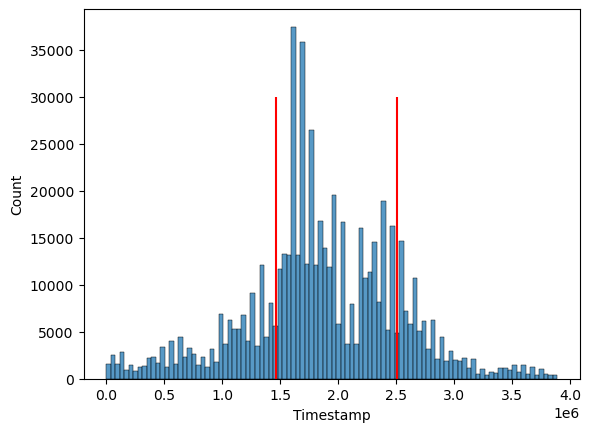

In [18]:
sns.histplot(tweets_df[tweets_df["Likes"] > 0]["Timestamp"], bins=100)
plt.vlines([datetime.strptime("2021-10-31","%Y-%m-%d").timestamp()-min_ts, datetime.strptime("2021-11-12","%Y-%m-%d").timestamp()-min_ts],
           0, 30000, 'red')
plt.plot()

In [21]:
users_df = pd.DataFrame(tweets_df.groupby("Username")["Followers"].mean())
users_df = users_df.merge(pd.DataFrame(tweets_df.groupby("Username")["ID"].count()), on='Username', how='left')
users_df = users_df.merge(pd.DataFrame(tweets_df.groupby("Username")["Likes"].mean()).rename(columns={"Likes":"Mean Likes"}), on='Username', how='left')
users_df = users_df.merge(pd.DataFrame(tweets_df.groupby("Username")["Likes"].max()), on='Username', how='left')
users_df = users_df.merge(tweets_df[['Username', 'Likes', 'Content']], on=['Username', 'Likes'], how='left')

users_df.rename(columns={"ID":"Tweet Count", "Likes":"Max Likes", "Content":"Most Liked Tweet"}, inplace=True)
users_df.sort_values(by="Followers", inplace=True, ascending=False)

In [29]:
users_df

,Username,Followers,Tweet Count,Mean Likes,Max Likes,Most Liked Tweet
21363,BarackObama,1.332417e+08,3,15621.333333,18122,I spoke at COP26 in Glasgow about what’s happe...
300095,narendramodi,8.469354e+07,8,21694.250000,35573,Met PM @BorisJohnson on the sidelines of the @...
204679,YouTube,7.783455e+07,3,617.666667,1113,#COP26 is here so let's send a message to worl...
132038,NASA,6.746516e+07,1,3150.000000,3150,We're taking part in the #COP26 summit. Learn ...
233075,cnnbrk,6.408862e+07,5,1612.000000,4426,President Joe Biden apologized to world leader...
...,...,...,...,...,...,...
7828,AfrocomMullah,0.000000e+00,1,0.000000,0,@edmnangagwa @COP26 But why you lie to people ...
313118,pricelessrubyj1,0.000000e+00,2,2.000000,4,@G_Dragonzz @portalblackpink @ygofficialblink ...
60797,ElleRob25656399,0.000000e+00,3,8.000000,12,@elspeth2341 @obsidian_blue @scobie @Earthshot...
20676,Baba0Riley1,0.000000e+00,1,0.000000,0,What is COP26? Where does it come from?


In [34]:
users_df[(users_df["Followers"] > 1000) & ((users_df["Tweet Count"] > 2) | (users_df["Mean Likes"] > 100))].head(50)

,Username,Followers,Tweet Count,Mean Likes,Max Likes,Most Liked Tweet
21363,BarackObama,1.332417e+08,3,15621.333333,18122,I spoke at COP26 in Glasgow about what’s happe...
300095,narendramodi,8.469354e+07,8,21694.250000,35573,Met PM @BorisJohnson on the sidelines of the @...
204679,YouTube,7.783455e+07,3,617.666667,1113,#COP26 is here so let's send a message to worl...
132038,NASA,6.746516e+07,1,3150.000000,3150,We're taking part in the #COP26 summit. Learn ...
233075,cnnbrk,6.408862e+07,5,1612.000000,4426,President Joe Biden apologized to world leader...
24710,BillGates,6.123214e+07,7,2272.857143,2960,Encouraged to discuss with PM @narendramodi on...
31894,CNN,6.065739e+07,60,263.100000,1430,Tuvalu's foreign minister gave a speech to #CO...
304665,nytimes,5.469889e+07,60,505.216667,3229,"""Vote like your life depends on it, because it..."
143670,PMOIndia,5.161981e+07,4,5789.500000,10907,PM @narendramodi landed in Glasgow to take par...
19134,BBCBreaking,5.148310e+07,11,1489.272727,5715,First major deal at COP26 climate summit sees ...


<AxesSubplot:xlabel='Followers', ylabel='Tweet Count'>

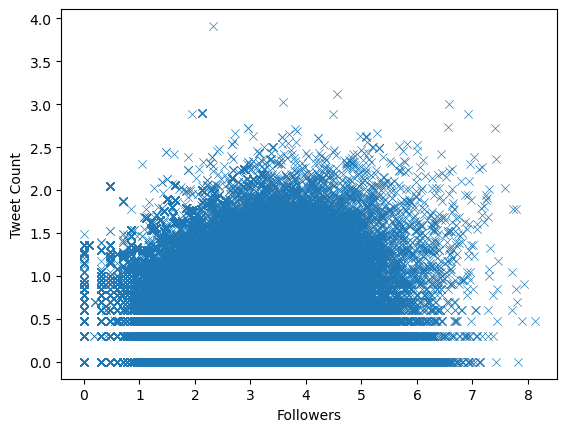

In [28]:
sns.scatterplot(x=np.log10(users_df["Followers"]+1), y=np.log10(users_df["Tweet Count"]), marker='x')

<AxesSubplot:xlabel='Followers', ylabel='Percent'>

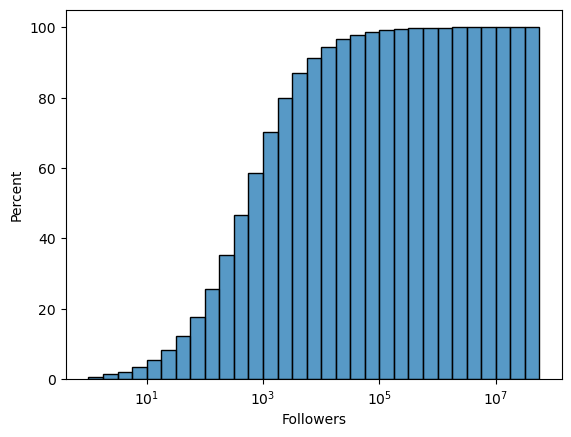

In [139]:
sns.histplot(users_df[users_df["Followers"]>0]["Followers"], bins = np.arange(0,8,0.25), log_scale=10, cumulative=True, stat="percent")

<AxesSubplot:xlabel='Tweet Count', ylabel='Percent'>

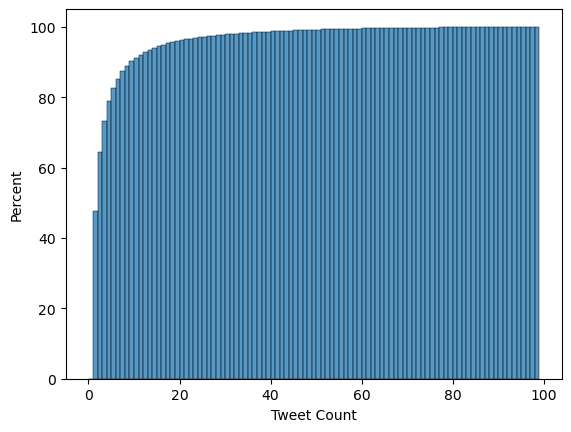

In [73]:
sns.histplot(users_df["Tweet Count"], bins = np.arange(0,100,1), cumulative=True, stat="percent")

In [50]:
top_users_df = users_df[(users_df["Followers"] > 10) & (users_df["Tweet Count"] > 10) & (users_df["Mean Likes"] > 10)].sort_values(by='Max Likes',ascending=False)
for i in range(100):
    x = top_users_df.iloc[i]
    print("Tweet #",i)
    print("Username",x["Username"])
    print("Followers",x["Followers"])
    print("Number of likes",x["Max Likes"])
    print(x["Most Liked Tweet"].replace("\n"," "),"\n")

Tweet # 0
Username GretaThunberg
Followers 4959790.24
Number of likes 107161
I am pleased to announce that I’ve decided to go net-zero on swear words and bad language. In the event that I should say something inappropriate I pledge to compensate that by saying something nice. #COP26 

Tweet # 1
Username NicolaSturgeon
Followers 1520631.7777777778
Number of likes 44303
🇺🇸🏴󠁧󠁢󠁳󠁣󠁴󠁿 Amidst all the serious business at #COP26 today, I’m pleased to also report that @AOC now has a supply of Irn Bru https://t.co/3yhisZ9PiN 

Tweet # 2
Username PrisonPlanet
Followers 1328661.9166666667
Number of likes 37094
Wealthy technocrats arriving on private jets staying at luxury 5 star hotels and being chauffeured around in large entourages are about to spend the next 2 weeks lecturing us about how we need to reduce our living standards.  I won't be listening and neither should you.  #COP26 

Tweet # 3
Username sophiehowe
Followers 16225.25
Number of likes 28276
Such a powerful image - the Minister from Tu

In [8]:
for i in range(100):
    x = tweets_df.sort_values(by='Likes',ascending=False).iloc[i]
    print("Tweet #",i)
    print("Date:",x["Date"])
    print("Number of likes",x["Likes"])
    print(x["Content"].replace("\n"," "),"\n")

Tweet # 0
Date: 2021-11-03 11:10:42+00:00
Number of likes 107161
I am pleased to announce that I’ve decided to go net-zero on swear words and bad language. In the event that I should say something inappropriate I pledge to compensate that by saying something nice. #COP26 

Tweet # 1
Date: 2021-10-30 19:46:23+00:00
Number of likes 106198
Finally in Glasgow for the #COP26! And thank you for the very warm welcome…😅 https://t.co/mK4vl7iTM1 

Tweet # 2
Date: 2021-11-03 02:00:01+00:00
Number of likes 101759
We can still realise what was promised in Paris 2015. We can still save our planet. We can still save our future. 🌍  WATCH our message to world leaders at today’s UN Climate Change Conference – COP26 in #Glasgow #ClimateActionInYourArea #TogetherForOurPlanet #BLINKS @COP26 https://t.co/nUyEDGZr36 

Tweet # 3
Date: 2021-11-02 00:37:26+00:00
Number of likes 96388
When you’re sitting next to 95-year-old Sir David Attenborough and you *still* can’t be arsed to wear a mask.  Or even stay awake